In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
asd_origin = pd.read_csv('/Users/brogab/Documents/JAXFell25/data/syntactic_grooming_raw/asd_bouts_08232024.csv')

In [7]:
print(asd_origin.shape)
asd_origin.head(10)

(27337, 12)


,Start,Duration,State,Video_name,NetworkFilename,Strain,Sex,End,Syntax,Ordered_State,Bout,Filtered_State
0,0,4739,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,4739,Not_Grooming,0,0,0
1,4739,239,0,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,4978,Paw_Lick,1,1,1
2,4978,3,1,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,4981,Bilateral_Face_Wash,2,1,2
3,4981,1179,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,6160,Not_Grooming,0,0,0
4,6160,154,3,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,6314,Genital_Groom,5,2,5
5,6314,923,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7237,Not_Grooming,0,0,0
6,7237,96,3,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7333,Genital_Groom,5,3,5
7,7333,605,6,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7938,Not_Grooming,0,0,0
8,7938,21,1,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7959,Bilateral_Face_Wash,2,4,2
9,7959,26,0,asd/projects/kumar-lab/open-field-datasets/aut...,LL1-B2B/2016-05-19_SPD/LL1-1_101043-M-AX4-13-4...,B6129SF1/J,M,7985,Paw_Lick,1,4,1


In [5]:
print(asd_origin.columns)

Index(['Start', 'Duration', 'State', 'Video_name', 'NetworkFilename', 'Strain',
       'Sex', 'End', 'Syntax', 'Ordered_State', 'Bout', 'Filtered_State'],
      dtype='object')


In [10]:
vid_names = np.unique(asd_origin.loc[:, 'Video_name'])
print(vid_names.shape)

(101,)


In [11]:
vid_0 = asd_origin[asd_origin['Video_name'] == vid_names[0]]
vid_0.shape

(254, 12)

In [12]:
syntax = np.unique(vid_0['Syntax'])
print(syntax)

['Bilateral_Face_Wash' 'Flank_Lick' 'Genital_Groom' 'Not_Grooming'
 'Paw_Lick' 'Tail_Groom' 'Unilateral_Face_Wash']


In [18]:
sle = sklearn.preprocessing.LabelEncoder()
vid_0_synVec = vid_0['Syntax'].copy()
print(np.unique(vid_0_synVec))
vid_0_synVec_LE = sle.fit_transform(vid_0_synVec)
print(np.unique(vid_0_synVec_LE))

['Bilateral_Face_Wash' 'Flank_Lick' 'Genital_Groom' 'Not_Grooming'
 'Paw_Lick' 'Tail_Groom' 'Unilateral_Face_Wash']
[0 1 2 3 4 5 6]


0: Bilateral_Face_Wash
1: Flank_Lick
2: Genital_Groom
3: Not_Grooming
4: Paw_Lick
5: Tail_Groom
6: Unilateral_Face_Wash


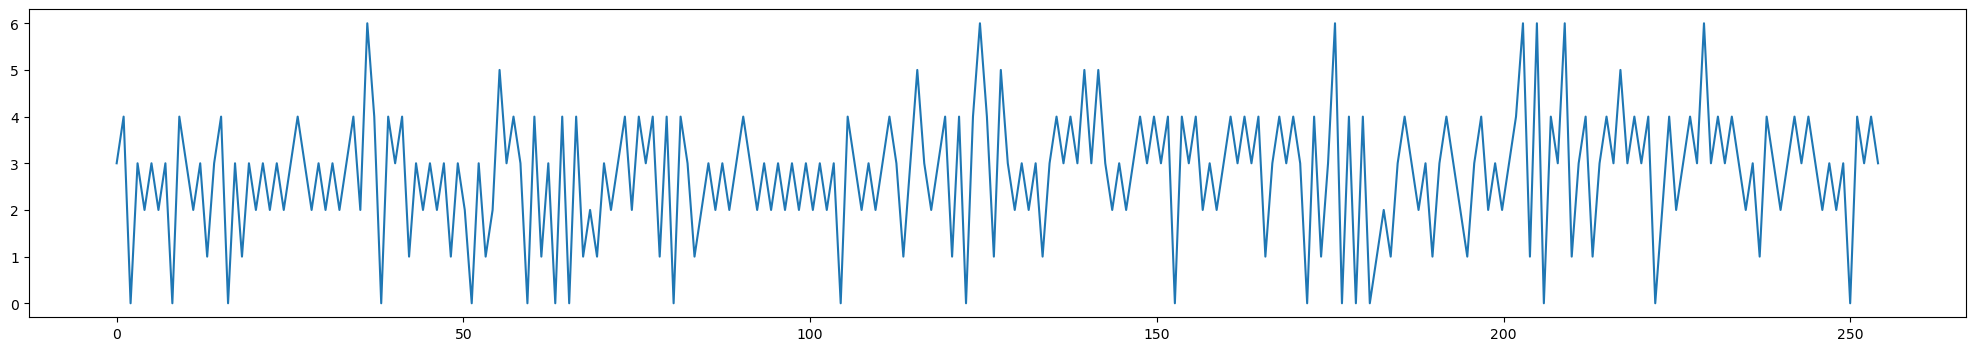

In [35]:
for i in range(np.unique(vid_0_synVec_LE).shape[0]):
    print(f'{i}: {np.unique(vid_0_synVec)[i]}')

x = np.linspace(0, vid_0_synVec_LE.shape[0], vid_0_synVec_LE.shape[0])

plt.figure(figsize=(25, 4))
plt.plot(x, vid_0_synVec_LE)
#plt.xticks(np.unique(vid_0_synVec))

plt.show()

In [56]:
print(np.unique(asd_origin['Video_name']).shape[0])

101


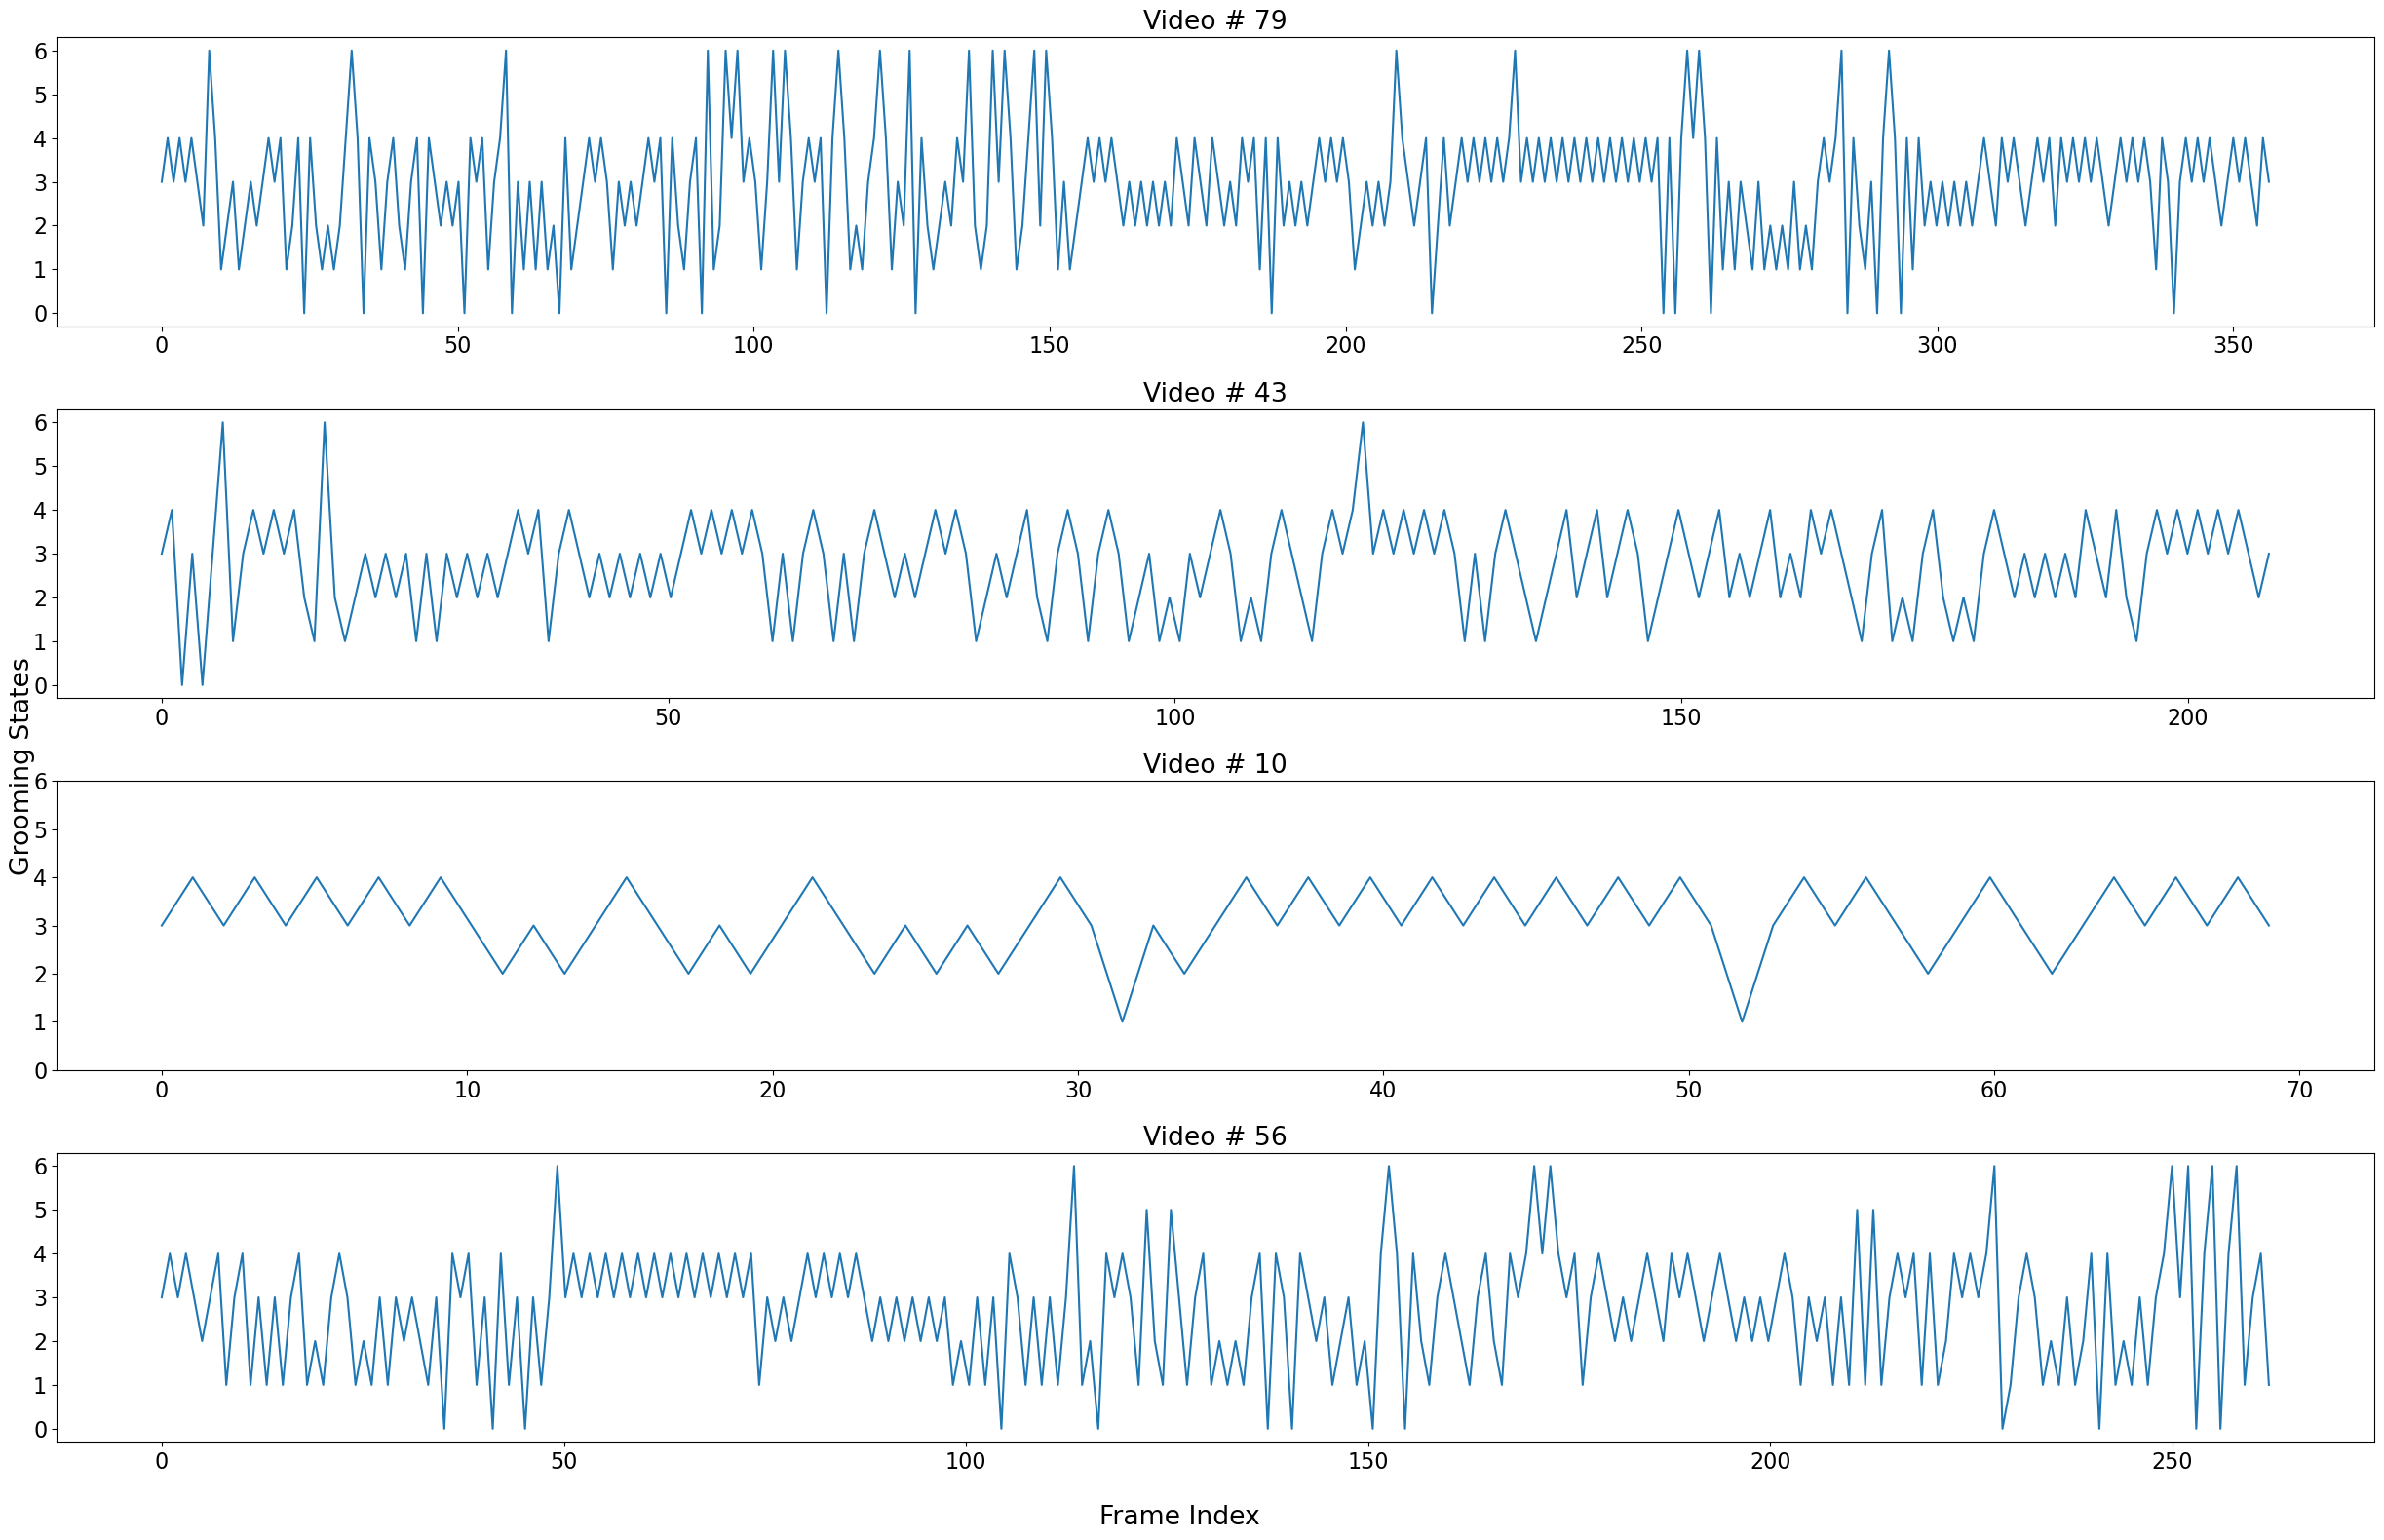

In [59]:
def vid_compare(df: pd.Dataframe, vid_ids: list, plot_size: tuple = None):
    "Displays syntax classifications for specified sequence of videos drawn from dataframe in plot array."

    sle = sklearn.preprocessing.LabelEncoder()
    le_vid_vec = sle.fit_transform(df['Video_name'].copy())
    le_syn_vec = sle.fit_transform(df['Syntax'].copy())

    #vid_ids_bvec = np.isin(le_vid_vec, vid_ids).astype(int)

    #sub_df = df.iloc[vid_ids_bvec, :]
    #le_syn_vec = sle.fit_transorm(df['Syntax'].copy())

    fig, axes = plt.subplots(len(vid_ids), 1, figsize=(25, 4*len(vid_ids)))
    plt.rcParams.update({'font.size': 16})

    for idx, vid_id in enumerate(vid_ids):
        x = np.linspace(0, le_syn_vec[le_vid_vec == vid_id].shape[0], le_syn_vec[le_vid_vec == vid_id].shape[0])
        axes[idx].plot(x, le_syn_vec[le_vid_vec == vid_id])

        axes[idx].set_title(f'Video # {vid_id + 1}')
        axes[idx].set_yticks(np.arange(0, 7))

        fig.supxlabel("Frame Index")
        fig.supylabel("Grooming States")

    plt.tight_layout()
    plt.show()

vid_compare(asd_origin, [78, 42, 9, 55])